## Finding meaning in words counts (semantic analysis)

**Semantic analysis** emphasises the use of machines/programmes to understand the 'meaning' of words.
<br>
A reminder of TF-IDF word vectors scores for n-grams is that the application is useful for searching text if the exact words/n-grams that are to be subsequently search are known. 
<br>
NLP applications in the past have found such algorithms for revealing the meaning of word combinations and computing vectors to represent this meaning - ***latent semantic analysis (LSA)***. Utilising this tool not only represents the meaning of words as vectors, but can also be used to represent the meaning of entire documents.

Learning more about ***semantic/topic vectors***, we can use weighted frequency scores from TFIDF vectors to compute the topic 'scores' that make up the dimensions of our topic vectors. The idea is to use the correlation of normalized term frequencies with each other to group words together in topics to define the dimensions of our new topic vectors.
<br>
Such methods make it possible to utilise interesting applications e.g. making it possible to search for documents based on their meaning - ***semantic search***. At times, semantic search returns search results that are much better than keyword search (TF-IDF search). It can return documents that are exactly what the user is searching for, even when the user can't think of the right words to put in the query.

Semantic vectors help us identify the words or n-grams that best represent the subject (topic) of a statement, document or corpus (collection of documents). Given this vector representation of words along with their *relative* importance, you can provide someone with the most meaningful words for a document - a set of keywords that summarizes its meaning.
<br>
Semantic vectors enable the possibility to compare any two statements/documents and tell how 'close' they are in *meaning* to each other.

Combinations (linear) of words that make up the dimensions of our topic vectors are powerful representations of meaning.

### Word Counts to topic vectors 

Here, we want to score the meanings and topics the words are used for.

#### TF-IDF vectors and lemmatization

Any word vector representation such as TF-IDF count the exact spellings of terms in a document. 
<br>
As a reminder, texts that restate the same meaning will have completely different TF-IDF vector representations if they spell things differently or use different words. Such cases can confuse search engines and also document similarity comparisons relying on token counts.

The lemmatization approach kept similarly *spelled* words together within an analysis, but not necessarily words with similar meanings - failing to pair up most synonyms.
<br>
This is challenging as synonyms differ in more ways than just word endings that lemmatization and stemming deal with.
<br>
Sometimes, lemmatization and stemming can actually mistakenly group together antonyms.

Consequently, two chunks of text that talk about the same thing but use different words will not be 'close' to each other in our lemmatized TF-IDF vector space model.
<br> 
An instance might be that the TF-IDF vector for one chapter in a book about NLP may not be close at all to similar-meaning passages in university textbooks about latent semantic indexing.
<br>
Generally, the NLP book might use more modernised jargon/terms than the university textbook, where university researchers use more consistent and rigorous language within textbooks/lectures.

#### Topic vectors 

We need to search for a more optimal method to extract additional information and meaning from word statistics i.e. a better estimate of what the words in a document 'signify'. 
<br>
Also, being wary of a better estimate of what the words in a document 'signify', all the while trying to understand what the combination of words *means* in a certain document. This would mean we'd like to represent that meaning with a vector that's like a TF-IDF vector, yet more compact and meanigful.
<br>


We come up with two terms to describe the context:
<br>
1. **word-topic vectors** - Compact meaning vectors 
<br>
2. **document-topic** - Document meaning vectors 
<br>
<br>
In any case, either of these can be called **topic vectors**
<br>
Topic vectors can be compact or as expansive (high dimensions) as desired. LSA topic vectors can have as little as one dimension or thousands of dimensions.

the mathematical operations between topic vectors (addition and subtraction) mean more than they did with TF-IDF vectors.
<br>
The distances between topic vectors is useful for things like clustering documents or semantic search (including search by semantics) - whereas doing TF-IDF topic modelling could only cluster and search using keywords via TF-IDF vectors.

After these computations are completed, we'll have one document-topic vector for each document in the corpus - which also usually translates to not having to reprocess the entire corpus to compute a new topic vector for a new document or phrase.
<br>
We'll have a topic vector for each word in our lexicon (vocabulary), where we can use/compute these word topic vectors for any new document by adding up all its word topic vectors. 

Numerical representations of the semantics of words/sentences can be tricky.
<br>
Given languages like English have multiple diaclects and different interpretations of the same words - the concept of words with multiple meanings is known as ***polysemy***:
* ***polysemy*** - The existence of words and phrases with more than one meaning 

Some ways polysemy can affect the semantics of word/statements. LSA actually manages handling these situations for us:
* ***Homonyms*** - Words with the same spelling and pronounciation but different meanings e.g Bat (baseball bat and animal)
* ***Zeugma*** - Use of two meanings of a word simultaneously in the same sentence e.g. I held **her hand** and **my tongue**

LSA also deals with some of the challenges of polysemy in a voice interface (chatbot) that one can talk to, like Alexa or Siri:
* ***Homographs*** — Words spelled the same, but with different pronunciations and meanings e.g. Bass (type of fish OR low deep voice)
* ***Homophones*** - Words with the same pronunciation, but different spellings and meanings (an NLP challenge with voice interfaces) e.g. Blew and Blue



#### Thought experiments

Assuming we have a TF-IDF vector for a certain document and we want to convert that to a topic vector - think about how much each contributes to such named topics.

> Let’s say we're processing some sentences about pets in Central Park in New York City (NYC). We can create three topics: one about pets, one about animals, and another about cities. 
<br>
Call these topics 'petness', 'animalness', and 'cityness'. So your 'petness' topic about pets will score words like 'cat' and 'dog' significantly, but probably ignore words like 'NYC' and 'apple'. The 'cityness' topic will ignore words like 'cat' and 'dog', but might give a little weight to 'apple', just because of the 'Big Apple' association.

An example would be where we 'train' the topic model as specified, and without using a computerised based solution (solely logic/common sense), we might come up with some weights like this.

In [1]:
import numpy as np 

In [2]:
# Example tf-idf dict with randomised scores/weights
topic = {} 
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))

In [3]:
topic['petness'] = (0.3 * tfidf['cat'] +\
                    0.3 * tfidf['dog'] +\
                    0 * tfidf['apple'] + 0 * tfidf['lion'] - 0.2 * tfidf['NYC'] +\
                    0.2 * tfidf['love'])

In [4]:
topic['animalness'] = (0.1 * tfidf['cat'] +\
                       0.1 * tfidf['dog'] +\
                       0.1 * tfidf['apple'] + 0.5 * tfidf['lion'] + 0.1 * tfidf['NYC'] -\
                       0.1 * tfidf['love'])

In [5]:
topic['cityness'] = (0 * tfidf['cat'] -\
                     0.1 * tfidf['dog'] +\
                     0.2 * tfidf['apple'] - 0.1 * tfidf['lion'] + 0.5 * tfidf['NYC'] +\
                     0.1 * tfidf['love'])

Manual weights e.g like in 'petness' topic (0.3, 0.3, 0, 0, -0.2, 0.2) are multiplied by the randomised/imaginary tfidf values to create topic vectors for this imaginary/random document.

In this example, we added up word frequencies that might be indicators of each topics.
<br>
We weighted the word frequencies (TF-IDF values) by how likely the word is associated with the topic. Similarly, for words that might be talking about something that is in some way the opposite of our topic, -ve weights would mean a disimilarity.
<br>
Running through this process, we get an illustration and simulation of how we teach a machine to think closer towards a human in term of natural language.
<br>
We arbitrarily chose to decompose our words and documents into only three topics ('petness', 'animalness' and 'cityness') - with a limited vocabulary of only six words.

The next high level step is to think how a human might decide mathematically which topics/words are connected, along with what specific weights such connections should have.
* positve associations within topic - The terms 'cat' and 'dog' should have similar contributions to the 'petness' topic (weight of 0.3)
* Negative associations within topic - The term 'NYC' should have a negative weight for the 'petness' topic. In general, city names, proper names, abbreviations and acronyms share little in common with words about pets.

N.B - It's a good idea to keep a note of what 'sharing in common' means for words, ideally searching for something in a TF-IDF matrix that represents the meaning the words share in common.

***topic vectors weight computation:***
<br>
<br>
Given the above signed weighting of words to produce topic vectors, given it was done manually, we decided to normalize the topic vectors via the $L^2$-norm.
<br>
Genuine applications of LSA normalizes topic vectors in a similar way as well via the $L^2$-norm. 
<br>
$L^2$-norm is simply the traditional Euclidean distance/length that is conventionally seen in basic geometry. 
<br>
It can be seen as the Pythagorean theorem solved for the length of the hypotenuse of a right triangle.

The relationships between words and topics can be reversed.
<br>
The 3 x 6 matrix of three topics can be transposed to produce topic weights for each word in our vocabulary (i.e. 6 x 3 matrix)

In [6]:
# These vectors of weights would be our word vectors for our 6 words 
word_vector = {}
word_vector['cat'] = 0.3 * topic['petness'] +\
                     0.1 * topic['animalness'] +\
                     0 * topic['cityness']
word_vector['dog'] = 0.3 * topic['petness'] +\
                     0.1 * topic['animalness'] -\
                     0.1 * topic['cityness']
word_vector['apple'] =  0 * topic['petness'] -\
                        0.1 * topic['animalness'] +\
                        0.2 * topic['cityness']  
word_vector['lion'] = 0 * topic['petness'] +\
                      0.5 * topic['animalness'] -\
                      0.1 * topic['cityness']  
word_vector['NYC'] =  -0.2 * topic['petness'] +\
                      0.1 * topic['animalness'] +\
                      0.5 * topic['cityness']
word_vector['love'] = 0.2 * topic['petness'] -\
                      0.1 * topic['animalness'] +\
                      0.1 * topic['cityness']                                              

In [7]:
#from pathlib import Path
#import os 

In [8]:
#path = Path().home()/'Desktop'/'nlp-map-project'/'chp4-nlpia-notes'/'img-vects'
#os.chdir(path)

<img src="img-vects/3d-vector-depiction-topic-vectors.png" alt="3D vectors referring to six words and associated topic vectors" width="400" height='250'/>

Figure 1 NLPIA Lane, Howard and Hapke (2019) chp 4.1.3 pp. 287 Apple iBooks.

As seen in Figure 1, these six topic vectors (one for each word) represent the meanings of our six words as 3D vectors.
* Counting up occurrences of these six words and multiplying them by our weights retrieves the 3D topic vector for any document
* Illustration - 3D vectors make it easy for humans to visualise, enabling us to plot and share insights about a corpus/specific document in graphical form
* Classification problems - 3D vectors (or any low-dimensional vector space) are convenient for ML supervised learning (Classification) problems, as an algorithm can partition across the vector space with a plane/hyperplane, dividing up the space into classes

Most documents in a corpus will use many more distinct words, but such a topic model in this case will only be influenced by the use of such six words.
* Extension - We can extend such approach to as many words as one specified (taking into account dimensionality) amongst an algorithm
* Constraints - If the model only needed to separate documents according to three different dimensions/topics (given the thought experiments), the vocabulary could keep growing as desired

In our thought experiments, we compressed six dimensions (TF-IDF normalized frequencies) into three dimensions (topics).

One caveat to this labour-intensive approach to semantic analysis is that it relies on human intuition and common sense to break down documents into topics, where common sense is hard to code into an algorithm.
* Human constraint - A human couldn't allocate a sufficient amount of words to enough topics to precisely capture the meaning in any diverse corpus of documents we might want our machine to deal with
* Algorithm - To automate this manual process, use an algorithm that doesn't rely on common sense to select topic weights for us
* Computation - Each of these weighted sum is just a dot product. Three dot products (weighted sums) is just a matrix multiplication, or inner product. You multiply a 3 x n weight matrix with a TF-IDF vector (one value for each word in a document), where n is the number of terms in your vocabulary. The output of this multiplication is a new 3 x 1 topic vector for that document.
* Vocabulary notation - The size of the vocabulary (the set of all possible words in a language) is usually written as $|V|$. And the variable $V$ alone is used to represent the set of possible words in your vocabulary

#### An algorithm for scoring topics

We need an algorithmic way to determine these topic vectors - given a transformation from TF-IDF word vector representations into topic vectors.
<br>
A concept brought about by British linguist J.R Firth around the 20th century studied ways in which one can estimate what a word or morphene (smallest meaningful parts of a words such as in, come, -ing for incoming) signifies.
<br>
An excerpt from him in 1957 when referring on how to compute topics for words:
> You should know a word by the company it keeps.

To infer the 'company' of a word, the most basic approach is to count co-occurrences in the same document.
<br>
Such word vector representations that were already covered via bag-of-words (BOW) and TF-IDF vectors.
<br>
This 'counting co-occurrences' approach led to the development of several algorithms for creating vectors to represent the statistics of word usage within documents or sentences.


LSA thus comprises of an algorithm to analyse our TF-IDF matrix (table of TF-IDF vectors) to collate words into topics. It can work on BOW vectors as well, but TF-IDF vectors give slightly better results.
* Process - LSA optimises such topics to maintain diversity in the topic dimensions. When we use these newly constructed topics instead of the original words, you still capture much of the meaning (semantics) of the documents
* Dimensionality reduction - The number of topics one would need for a model to capture the meaning of your documents is far less than the number of words in the vocabulary of a standard TF-IDF vectors. LSA is often referred to as a dimension reduction technique. Hence, LSA reduces the number of dimensions one would need to capture the meaning of documents

For other highly demanding ML tasks (related to dimensions for a large matrix of numbers) such a image analysis/classification, a common technique during the intermediary steps of the transformation is known as **Pricipal Components Analysis (PCA)**
* PCA relevance - PCA uses the same computational processing or math as LSA
* PCA discovery - Researchers only discovered recently that one could use PCA for semantic analysis of words, where it was only commonly found for reducing the dimensionality/tables of numbers, rather than TF-IDF/BOW vectors. Hence, they gave such application to NLP it own name as **LSA**
* LSA synonyms - Under the field of information retrieval, where the focus is on creating indexes for full text search, LSA can also sometimes be referred to as **latent semantic indexing (LSI)**

To define further the concept of **indexing**, this is what databases do to be able to retrieve a certain row in a table quickly based on some partial information one would provide about such specific row.
* Textbook index - When looking for a certain page, one could look up words in the index that should be on that page. Then it's easy enough to go straight to the page(s) that contain all the words that one is looking for

Two algorithms are known to be similar to LSA, given similar NLP applications: 
<br>
<br>
1. **Linear discriminant analysis (LDA)** 
<br>
2. **Latent Dirichlet allocation (LDiA)**
<br>
<br>
LDA breaks down a document into only one topic. LDiA is more like LSA because it can break down documents into as many topics as you like.

A further technical note is that LDA doesn’t require **singular value decomposition (SVD)**. 
* We can just compute the centroid (average or mean) of all your TF-IDF vectors for each side of a binary class, like spam and nonspam
* Our dimension then becomes the line between those two centroids 
* The further a TF-IDF vector is along that line (the dot product of the TF-IDF vector with that line) tells you how close you are to one class or another

#### An LDA classifier

Starting with an example run of an LDA classifier to inform us about topic analysis will give us context to later methods through LSA and LDiA.
* LDA level - LDA can be seen as one of the straightforward classification models and fast dimension reduction techniques
* Applications - LDA for many applications can also have much better accuracy than more advanced algorithms recently devised
* Functionality - Given it's a supervised algorithm, we need labels for our document class, but LDA requires relatively less samples than more complex algorithms

A simplified implementations of LDA, where the model 'training' contains only three steps:
<br>
1. Compute the average position (centroid) of all the TF-IDF vectors within the class (e.g. spam SMS messages)
<br>
2. Compute the average position of all the TF-IDF vectors within the class (e.g. nonspam SMS messages)
<br>
3. Compute the vector difference between the centroids (the line that connects them given a 3D depiction)

The basis of an LDA model is to find the vector (line) between the two centroids for our binary class (in this case 'spam' or 'ham')
* Generating predictions - To generate inferences/predictions with such model, we need to find out if a new TF-IDF vector is closer to the in-class (spam) centroid than it is to the out-of-class (nonspam) centroid

In [9]:
# train LDA model to classify SMS messages as spam or ham (nonspam)
import pandas as pd 
from nlpia.data.loaders import get_data
# Helps display the wide column of SMS text with a DataFrame printout
pd.options.display.width = 120 
sms = get_data(name='sms-spam')

In [10]:
# This step is optional but it makes it easier from a reporting perspective
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
sms['spam'] = sms.spam.astype(int)

In [11]:
print(sms.shape) # rows, columns 
print(sms.spam.sum())
print(sms.head(6))

(4837, 2)
638
       spam                                               text
sms0      0  Go until jurong point, crazy.. Available only ...
sms1      0                      Ok lar... Joking wif u oni...
sms2!     1  Free entry in 2 a wkly comp to win FA Cup fina...
sms3      0  U dun say so early hor... U c already then say...
sms4      0  Nah I don't think he goes to usf, he lives aro...
sms5!     1  FreeMsg Hey there darling it's been 3 week's n...


From this basic EDA, we have 4837 text messages and 638 of them are labeled with the binary class label 'spam'.

In [12]:
# We need to to a tokenization + TF-IDF vector transformation on all these SMS messages
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()

In [13]:
# Inevitable situation where using a tfidf model increases dimensions (columns)
print(tfidf_docs.shape)
print(sms.spam.sum())

(4837, 9232)
638


The `nltk.casual_tokenizer` retrieves 9232 words in our vocabulary - illustrating almost twice as many words in our vocabulary and almost 10 times as many words as spam messages. Generally, the model wouldn't have a significant amount of information about the words that'll indicate whether a message is spam or not.
<br>
Also, a Naive Bayes classifer wouldn't operate as well when the vocabulary is much larger than the number of labeled examples in our dataset.
<br>
Hence, semantic analysis techniques covered here can help us deal with this constraint.

In [14]:
# sklearn.discriminant_analysis.LinearDiscriminant-Analysis can also be used 
# although it's convenient to just compute the centroids of our binary class (spam/ham)
# to train this model 
mask = sms.spam.astype(bool).values # use values attribute to turn output contents into numpy array

In [15]:
# axis being '0' means the vectorization/functions are performed columnwise (independently)
spam_centroid = tfidf_docs[mask].mean(axis=0)
ham_centroid = tfidf_docs[~mask].mean(axis=0)
print(spam_centroid.round(2))
print(ham_centroid.round(2))

[0.06 0.   0.   ... 0.   0.   0.  ]
[0.02 0.01 0.   ... 0.   0.   0.  ]


From here, we take the difference between the spam and ham centroids to get the line between them

In [16]:
# The dot product (each word vector * difference between spam and ham centroids) computes the projection of each vector on the line between the centroids 
spamminess_scores = tfidf_docs.dot(spam_centroid - ham_centroid)
spamminess_scores.round(2)

array([-0.01, -0.02,  0.04, ..., -0.01, -0.  ,  0.  ])

The `spamminess_scores` is the distance along the line from the ham centroid to the spam centroid.
<br>
4837 dot products were computed simultaneously in a 'vectorised' numpy operation.

<img src="img-vects/3d-vector-scatterplot.png" alt="3D scatter plot (point cloud) of our TF-IDF vectors" width="400" height='400'/>

Figure 2 NLPIA Lane, Howard and Hapke (2019) chp 4.1.5 pp. 299 Apple iBooks.

As seen from the 3D scatter plot illustrating a view of TF-IDF vectors concerning its centroids from the SMS dataset (Figure 2), the arrow from the nonspam centroid to the spam centroid is the line that defines our trained model.
<br>
We can see how some of the green dots are on the back side of the arrow, so we can get the back side of the arrow - which can depict a ***negative*** spamminess score when we project them onto this line between the centroids. 

It would be more easier to standardise the `spamminess_scores` value i.e. a score between 0 and 1 similar to a probablity.
<br>
`MinMaxScaler` from `sklearn` can helps us with this:

In [17]:
from sklearn.preprocessing import MinMaxScaler
# as the API numpy recommends given these scores are a single column/feature 
# we 'drop' dimensions similar to transposing to get the correct column representation 
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_scores.reshape(-1,1))

In [18]:
sms['lda_predict'] = (sms.lda_score > 0.5).astype(int)
sms['spam lda_predict lda_score'.split()].round(2).head(6)

,spam,lda_predict,lda_score
sms0,0,0,0.23
sms1,0,0,0.18
sms2!,1,1,0.72
sms3,0,0,0.18
sms4,0,0,0.29
sms5!,1,1,0.55


All of the first six messages were classified correctly given the threshold set at 50%. 
<br>
Take the accuracy score to evaluate how the model performed on the rest of the training set.

In [19]:
# Using sklearn accuracy score function instead of filtering/computation version 
from sklearn.metrics import accuracy_score
accuracy_score(sms.spam, sms.lda_predict).round(3)


0.977

97.7% (3sf) of messages were correctly classified with this pretty simple LDA model.
<br>
Realistically, this isn't always the case when applied to real world data, as we haven't separated out a test set - for brevity given that we're generalising on 'seen' data only.
<br>
LDA is simple enough given it requires few parameters, where it should generalise well (that is on 'unseen data') so long as the SMS messages are already represented as the ones we intend to classify.

***ML model evaluation notes:***
<br>
The efficacy of semantic analysis approaches is that it doesn't necessarily rely on individual tokens unlike logistic or Naive Bayes models.
* Semantics approach - Semantic analysis gathers up words with similar semantics (such as spamminess) and clusters them together to come up with a prediction
* Considerations - This training set shown has a limited vocabulary and some non-English words in it. We would need to make sure our test messages use similar words if you want we want them to be classified correctly

In [20]:
import seaborn as sn # heatmap
import matplotlib.pyplot as plt # visualisations output
%matplotlib inline
from pugnlp.stats import Confusion # convenient api that provides output similar to crosstab

In [21]:
confusion_matrix = Confusion(sms['spam lda_predict'.split()])
confusion_matrix

lda_predict,0,1
spam,,
0,4135,64
1,45,593


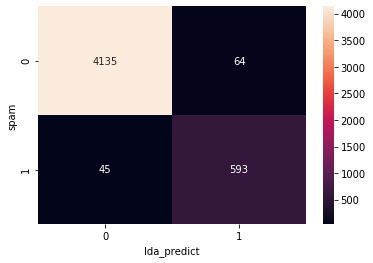

In [22]:
# seaborn heatmap visual to get a better idea of the algorithm performance
# detecting false positives, true negatives etc
sn.heatmap(data=confusion_matrix, annot=True, fmt='.0f')
plt.show()

A confusion matrix is convenient for further making granular the accuracy of such model in terms of identifying (in this case) SMS messages labelled as spam when it wasn't spam at all (**false positives**) and messages labelled as ham that instead should be labelled as spam (**false negatives**)
* Adjustment - Adjusting the 0.5 threshold can somewhat change the distribution of false positives (currently 64 in top right hand square) and false negatives (currently 45 in the lower left hand square), perhaps to anchor more to desired balance
* Limitations - Thus far under LDA, the main thing the 1D vectors 'understand' is the spamminess of words and documents. We'd also like to learn more regarding word nuances and give us a multidimensional vector that captures a word’s meaning.